In [328]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')  


In [329]:
data=pd.read_csv("data.csv")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [330]:
for i in data:
    print(i, data[i].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route ['BLR ? DEL' 'CCU ? IXR ? BBI ? BLR' 'DEL ? LKO ? BOM ? COK'
 'CCU ? NAG ? BLR

In [331]:
data.Date_of_Journey=data.Date_of_Journey.str.split('/')

In [332]:
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [333]:
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]


In [334]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [335]:
data.Route=data.Route.str.split('->')
data.Route

0                    [BLR ? DEL]
1        [CCU ? IXR ? BBI ? BLR]
2        [DEL ? LKO ? BOM ? COK]
3              [CCU ? NAG ? BLR]
4              [BLR ? NAG ? DEL]
                  ...           
10678                [CCU ? BLR]
10679                [CCU ? BLR]
10680                [BLR ? DEL]
10681                [BLR ? DEL]
10682    [DEL ? GOI ? BOM ? COK]
Name: Route, Length: 10683, dtype: object

In [336]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]

In [337]:
data.Dep_Time=data.Dep_Time.str.split(':')


In [338]:
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]


In [339]:
data.Arrival_Time=data.Arrival_Time.str.split('')

In [340]:
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]

In [341]:
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')

In [342]:
data['Arrival_date']=data.Arrival_Time.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]

In [343]:
data.Duration=data.Duration.str.split(' ')

In [344]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]
data.Travel_Mins=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Travel_Mins.str[0]

In [345]:
data.Duration=data.Duration.str.split(' ')

In [346]:
data['Travel_Hours']=data['Travel_Hours']
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data['Travel_Hours']

data.Travel_Mins=data.Travel_Mins.str.split('n')
data.Travel_Mins=data.Travel_Mins.str[0]

In [347]:
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

In [348]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [349]:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration             10683
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                10683
City3                10683
City4                10683
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date             0
Time_of_Arrival          0
Arrival_Time_Mins    10683
Travel_Hours             0
Travel_Mins              0
dtype: int64

In [350]:
data.drop(['City4'],axis=1,inplace=True)

In [351]:
data.drop(['Date_of_Journey','Route','Dep_Time','Duration'],axis=1,inplace=True)
data.drop(['Time_of_Arrival'],axis=1,inplace=True)

In [352]:
data.isnull().sum()

Airline                  0
Source                   0
Destination              0
Arrival_Time             0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                10683
City3                10683
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date             0
Arrival_Time_Mins    10683
Travel_Hours             0
Travel_Mins              0
dtype: int64

In [353]:
data['City1'].fillna('None',inplace=True)
data['City3'].fillna('None',inplace=True)
data['City2'].fillna('None',inplace=True)

In [354]:
data['Arrival_date'].fillna(data['Date'],inplace=True)

In [355]:
data['Travel_Mins'].fillna(0,inplace=True)
data['Arrival_Time_Mins'].fillna(0,inplace=True)
data['Total_Stops'].fillna(0,inplace=True)

In [356]:
data.drop(['Source','Arrival_Time','Total_Stops','City3'],axis=1,inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10683 non-null  object 
 1   Destination        10683 non-null  object 
 2   Additional_Info    10683 non-null  object 
 3   Price              10683 non-null  int64  
 4   Date               10683 non-null  object 
 5   Month              10683 non-null  object 
 6   Year               10683 non-null  object 
 7   City1              10683 non-null  object 
 8   City2              10683 non-null  object 
 9   Dep_Time_Hour      10683 non-null  object 
 10  Dep_Time_Mins      10683 non-null  object 
 11  Arrival_date       10683 non-null  object 
 12  Arrival_Time_Mins  10683 non-null  float64
 13  Travel_Hours       10683 non-null  object 
 14  Travel_Mins        10683 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.2+ MB


In [357]:
data.Date=data.Date.astype('int64')
data.Month=data.Month.astype('int64')
data.Year=data.Year.astype('int64')
# data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
# data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
# data.Dep_Time_Hour=data.Dep_Time_Mins.astype('int64')
# data.Arrival_date=data.Arrival_date.astype('int64')
# # # data.Arrival_Time_Hour=data.Arrival_Time_Hour.astype('int64')
# # data.Arrival_Time_Mins=data.Arrival_Time_Mins.astype('int64')
# data.Travel_Mins=data.Travel_Mins.astype('int64')

In [358]:
data[data['Travel_Hours']=='5m']

,Airline,Destination,Additional_Info,Price,Date,Month,Year,City1,City2,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Mins,Travel_Hours,Travel_Mins
6474,Air India,Hyderabad,No info,17327,6,3,2019,BOM ? GOI ? PNQ ? HYD,None,16,50,,0.0,5m,5m


In [359]:
data.drop(index=6474,inplace=True,axis=0)

In [360]:
data.Travel_Hours=data.Travel_Hours.astype('int64')


In [361]:
categorial=['Airline','Source,''Destination,''Additional_Info','City1']
numerical=['Total_Stop','Data,''Month','Year','Dep_Time_Mins','Arrival_Time_Hour','Arrival_Time_Mins','Travel_Hours','Travel_Mins']



In [362]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [363]:
data.Airline=le.fit_transform(data.Airline)
data.source=le.fit_transform(data.Airline)
data.Destination=le.fit_transform(data.Destination)
data.Total_stops=le.fit_transform(data.Airline)
data.City1=le.fit_transform(data.City1)
data.City2=le.fit_transform(data.Airline)
data.city3=le.fit_transform(data.Airline)
data.Additional_Info=le.fit_transform(data.Additional_Info)
data.head()

,Airline,Destination,Additional_Info,Price,Date,Month,Year,City1,City2,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,5,8,3897,24,3,2019,18,3,22,20,,0.0,2,2
1,1,0,8,7662,1,5,2019,84,1,05,50,,0.0,7,7
2,4,1,8,13882,9,6,2019,118,4,09,25,,0.0,19,19
3,3,0,8,6218,12,5,2019,91,3,18,05,,0.0,5,5
4,3,5,8,13302,1,3,2019,29,3,16,50,,0.0,4,4


In [364]:
data.head( )

,Airline,Destination,Additional_Info,Price,Date,Month,Year,City1,City2,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,5,8,3897,24,3,2019,18,3,22,20,,0.0,2,2
1,1,0,8,7662,1,5,2019,84,1,05,50,,0.0,7,7
2,4,1,8,13882,9,6,2019,118,4,09,25,,0.0,19,19
3,3,0,8,6218,12,5,2019,91,3,18,05,,0.0,5,5
4,3,5,8,13302,1,3,2019,29,3,16,50,,0.0,4,4


In [365]:
data.head( )

,Airline,Destination,Additional_Info,Price,Date,Month,Year,City1,City2,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,5,8,3897,24,3,2019,18,3,22,20,,0.0,2,2
1,1,0,8,7662,1,5,2019,84,1,05,50,,0.0,7,7
2,4,1,8,13882,9,6,2019,118,4,09,25,,0.0,19,19
3,3,0,8,6218,12,5,2019,91,3,18,05,,0.0,5,5
4,3,5,8,13302,1,3,2019,29,3,16,50,,0.0,4,4


In [366]:
data.describe( )

,Airline,Destination,Additional_Info,Price,Date,Month,Year,City1,City2,Arrival_Time_Mins,Travel_Hours
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.0,10682.000000
mean,3.966205,1.435967,7.392998,9086.292735,13.509081,4.708762,2019.0,74.827748,3.966205,0.0,10.247051
std,2.352090,1.474773,1.214254,4610.885695,8.479363,1.164294,0.0,36.731657,2.352090,0.0,8.495234
min,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.0,1.000000
25%,3.000000,0.000000,8.000000,5277.000000,6.000000,3.000000,2019.0,48.000000,3.000000,0.0,2.000000
50%,4.000000,1.000000,8.000000,8372.000000,12.000000,5.000000,2019.0,73.000000,4.000000,0.0,8.000000
75%,4.000000,2.000000,8.000000,12373.000000,21.000000,6.000000,2019.0,104.000000,4.000000,0.0,15.000000
max,11.000000,5.000000,9.000000,79512.000000,27.000000,6.000000,2019.0,128.000000,11.000000,0.0,47.000000


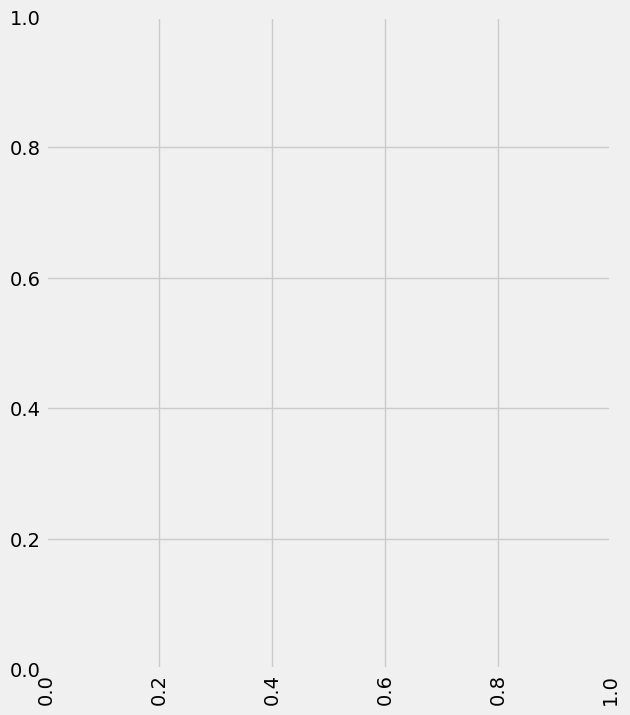

In [367]:
import seaborn as sns
c=1
plt.figure(figsize=(20,45))

for i in data:
    plt.subplot(6,3,8)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
    
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

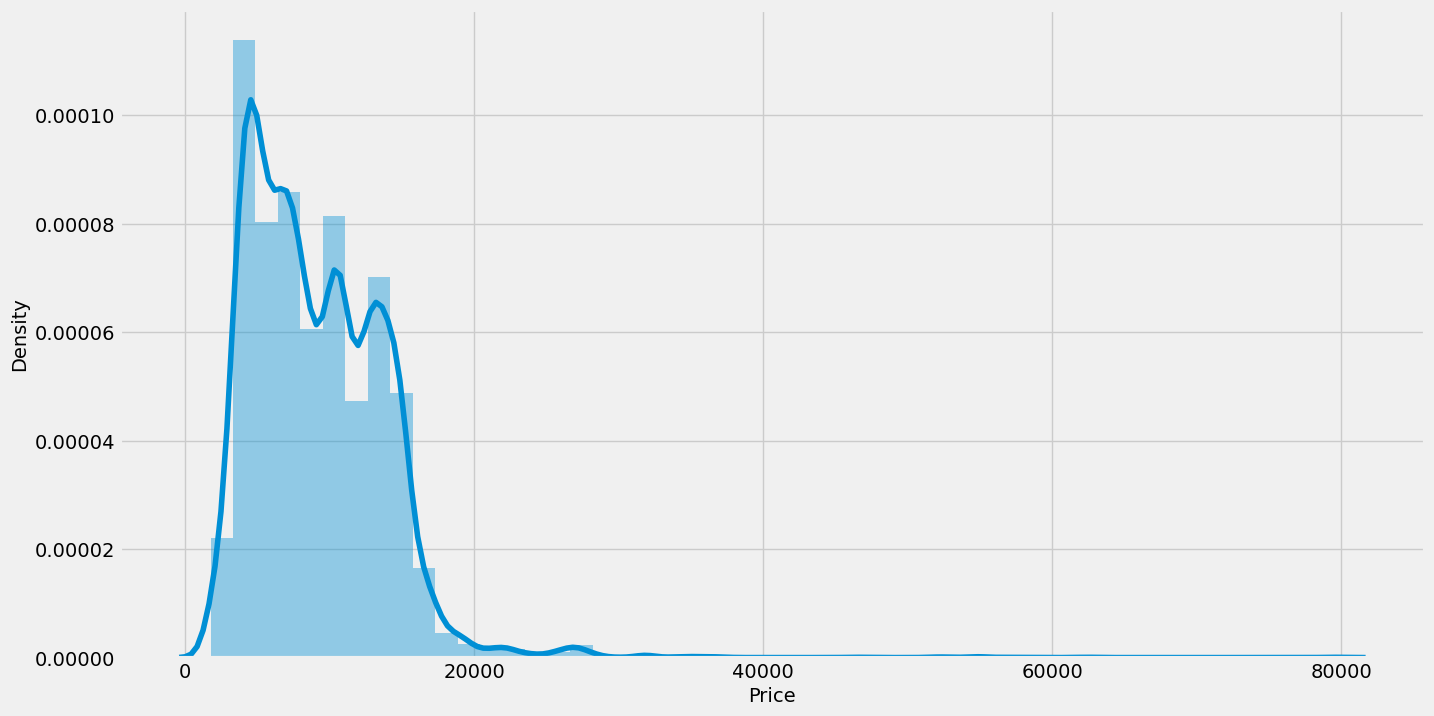

In [368]:
plt.figure(figsize=(15,8))
sns.distplot(data.Price)

<Axes: >

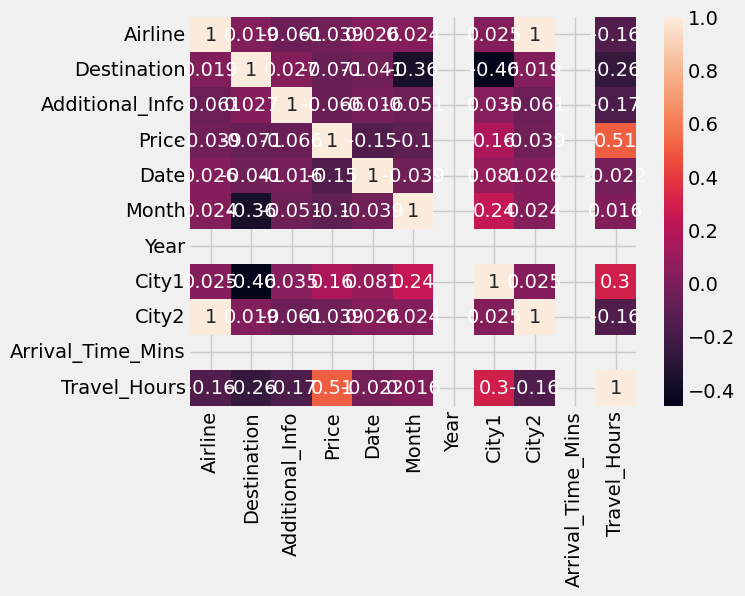

In [369]:
sns.heatmap(data.corr( ),annot=True)

<Axes: >

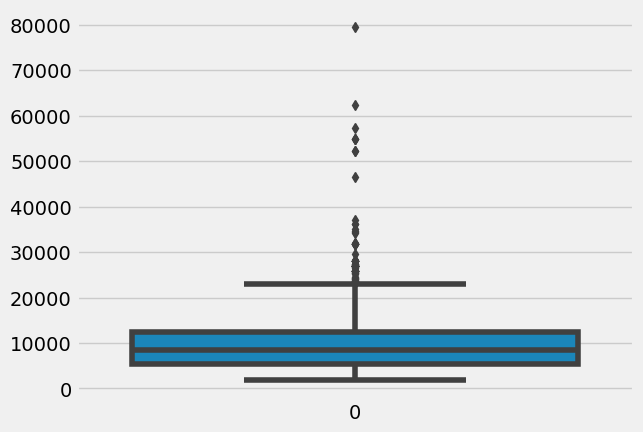

In [370]:
import seaborn as sns
sns.boxplot(data['Price'])


In [371]:
y=data['Price']
x=data.drop(columns=['Price'],axis=1)
      

In [372]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler( )
xi =pd.get_dummies(data)

In [373]:
x_scaled=ss.fit_transform(xi)


In [374]:
x_scaled = pd.DataFrame(x_scaled)
x_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,-0.410805,2.416778,0.499921,-1.125496,1.237288,-1.467707,0.0,-1.547178,-0.410805,0.0,...,-0.145684,-0.009676,-0.009676,-0.013685,-0.013685,-0.217146,-0.181316,-0.218560,-0.203307,-0.208494
1,-1.261152,-0.973732,0.499921,-0.308912,-1.475307,0.250153,0.0,0.249721,-1.261152,0.0,...,-0.145684,-0.009676,-0.009676,-0.013685,-0.013685,-0.217146,-0.181316,4.575401,-0.203307,-0.208494
2,0.014369,-0.295630,0.499921,1.040132,-0.531796,1.109082,0.0,1.175397,0.014369,0.0,...,-0.145684,-0.009676,-0.009676,-0.013685,-0.013685,-0.217146,-0.181316,-0.218560,-0.203307,-0.208494
3,-0.410805,-0.973732,0.499921,-0.622099,-0.177979,0.250153,0.0,0.440302,-0.410805,0.0,...,-0.145684,-0.009676,-0.009676,-0.013685,-0.013685,4.605204,-0.181316,-0.218560,-0.203307,-0.208494
4,-0.410805,2.416778,0.499921,0.914337,-1.475307,-1.467707,0.0,-1.247695,-0.410805,0.0,...,6.864191,-0.009676,-0.009676,-0.013685,-0.013685,-0.217146,-0.181316,-0.218560,-0.203307,-0.208494


In [375]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [376]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
10004,0.864716,-0.29563,0.499921,0.013600,1.591104,0.250153,0.0,0.794236,0.864716,0.0,...,-0.145684,-0.009676,-0.009676,-0.013685,-0.013685,-0.217146,-0.181316,-0.21856,-0.203307,-0.208494
3684,0.014369,-0.29563,-1.970848,0.712848,-0.531796,0.250153,0.0,0.794236,0.014369,0.0,...,-0.145684,-0.009676,-0.009676,-0.013685,-0.013685,-0.217146,-0.181316,-0.21856,-0.203307,-0.208494
1034,1.715063,-0.29563,0.499921,-0.759823,1.237288,-0.608777,0.0,1.257074,1.715063,0.0,...,-0.145684,-0.009676,-0.009676,-0.013685,-0.013685,-0.217146,5.515220,-0.21856,-0.203307,-0.208494
3909,0.864716,-0.29563,0.499921,-0.301755,0.883471,-1.467707,0.0,0.794236,0.864716,0.0,...,-0.145684,-0.009676,-0.009676,-0.013685,-0.013685,-0.217146,-0.181316,-0.21856,-0.203307,-0.208494
3088,-1.261152,-0.29563,0.499921,0.625876,1.237288,1.109082,0.0,0.957591,-1.261152,0.0,...,-0.145684,-0.009676,-0.009676,-0.013685,-0.013685,-0.217146,-0.181316,-0.21856,-0.203307,-0.208494


In [377]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

In [378]:
from sklearn.metrics import  r2_score,mean_absolute_error,mean_squared_error
for i in [rfr,gb,ad]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.2:
        print(i)
        print("R2 score is",r2_score(y_test,y_pred))
        print("R2 for train data",r2_score(y_train,i.predict(x_train)))
        print("Mean Absolute Error is",mean_absolute_error(y_pred,y_test))
        print("Mean Squred Error is",mean_squared_error(y_pred,y_test))
        print("Root Mean Sqaured Error is",(mean_squared_error(y_pred,y_test,squared=False)))

RandomForestRegressor()
R2 score is 0.9994459333557785
R2 for train data 0.9995189462033128
Mean Absolute Error is 4.274155357978477
Mean Squred Error is 11712.426945297148
Root Mean Sqaured Error is 108.22396659380559
GradientBoostingRegressor()
R2 score is 0.9998051869863487
R2 for train data 0.9999322230415014
Mean Absolute Error is 25.997835165581716
Mean Squred Error is 4118.156568673511
Root Mean Sqaured Error is 64.17286473793664
AdaBoostRegressor()
R2 score is 0.9736991343679273
R2 for train data 0.9751562889483746
Mean Absolute Error is 590.2505747009706
Mean Squred Error is 555974.575489067
Root Mean Sqaured Error is 745.6370266349888


In [379]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
Knn=KNeighborsRegressor()
svr=SVR()
dt=DecisionTreeRegressor()
for i in [Knn,svr,dt]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.1:
        print(i)
        print('R2 score is',r2_score(y_test,y_pred))
        print('R2 score for train data',r2_score(y_train,i.predict(x_train)))
        print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
        print('Mean Squared Error is',mean_squared_error(y_pred,y_test))
        print('Root Mean Squred Error is',(mean_squared_error(y_test,y_pred,squared=False)))

SVR()
R2 score is 0.00878651505341732
R2 score for train data 0.01611929537020329
Mean Absolute Error is 3523.81697416972
Mean Squared Error is 20953283.59992025
Root Mean Squred Error is 4577.475679882991
DecisionTreeRegressor()
R2 score is 0.9993922589679894
R2 score for train data 1.0
Mean Absolute Error is 4.118858212447356
Mean Squared Error is 12847.051006083295
Root Mean Squred Error is 113.34483228662565


In [380]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    cv=cross_val_score(rfr,x_train,y_train,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor() 0.9958619349681703
RandomForestRegressor() 0.9950677495837711
RandomForestRegressor() 0.9964702729877686


In [381]:
from sklearn.model_selection import RandomizedSearchCV

In [382]:
Param_grid={'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],'max_features':['auto','sqrt']}
rfr=RandomForestRegressor()
rf_res=RandomizedSearchCV(estimator=rfr,param_distributions=Param_grid,cv=3,verbose=2,n_jobs=-1)

rf_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [383]:
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV(estimator=gb,param_distributions=Param_grid,cv=3,verbose=2,n_jobs=-1)

gb_res.fit(x_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [384]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))


train accuracy 0.9899363189762572
test accuracy 0.9669370282857871


In [385]:
Knn=KNeighborsRegressor(n_neighbors=2,algorithm='auto',metric_params=None,n_jobs=-1)
Knn.fit(x_train,y_train)
y_train_pred=Knn.predict(x_train)
y_test_pred=Knn.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))


train accuracy 0.9278882613634172
test accuracy 0.6092975924077844


In [386]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))


train accuracy 0.9908534665359645
test accuracy 0.9644433708262835


In [389]:
price_list=pd.DataFrame({'Price':y_test_pred})

In [390]:
price_list

,Price
0,16577.5
1,5055.6
2,9368.4
3,3752.8
4,12676.9
...,...
2132,7983.9
2133,5011.8
2134,7289.0
2135,7285.4


In [391]:
import pickle
pickle.dump(rfr,open('model1.pkl','wb'))

In [395]:
import pickle
pickle.dump(rfr,open('model1.pkl','wb'))

In [ ]:
from flask import Flask,render_template,request
import numpy as np
import pickle
mode1 = pickle.load(open(r"model1.pkl",'rb'))
app =Flask(__name__)
@app.route("/home")
def home():
    return render_template('home.html')
@app.route("/predict")
def home1():
    return render_template('predict.html')
@app.route("/pred",methods=['POST','GET'])
def predict():
    x = [[int(x) for x in request.form.values()]]
    print(x)
    
    x = np.array(x)
    print(x.shape)
    
    
    print(x)
    pred = model.predict(x)
    print(pred)
    return render_template('submit.html',prediction_text=pred)
        
if __name__=="__main__":
    app.run(debug=False)   
    

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [22/Apr/2023 07:18:11] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [22/Apr/2023 07:18:14] "GET /favicon.ico HTTP/1.1" 404 -
